# Grammys Project
![](https://www.moviedebuts.com/wp-content/uploads/2021/05/ra_ga_logo.png)

Welcome to your first day as an intern for The Recording Academy, the non-profit organization behind the Grammy Awards! 

Your challenge is to help them decide whether they should merge grammy.com and recordingacademy.com into one website. If you saw the videos, Ray Starck, the VP of Digital Strategy at The Recording Academy (TRA), decided to split the websites to better serve their customers' needs. TRA has a new CEO, Harvey Wilson, and he is asking you to look at the data from these two websites, plus additional data from when the websites were merged prior to 2022. 

Harvey and Ray have said that if the websites are serving two distinct groups then the websites should stay separate. By "distinct" they are referring to visitors on the website that follow different patterns, e.g., they stay longer on the site or are coming from different demographics.

In the tasks below, you will look through several files, do some aggregations, joins, and more to answer this valuable business question!

Are you ready?!?!

Let's do this!

![](https://media.giphy.com/media/ZSK6UPKTSLZCKd7orz/giphy.gif)

## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`. 

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a user comes on a visit and does not interact with your website and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part I - Exploratory Data Analysis

![](https://media.giphy.com/media/6y6fyAD9OIE6NvhJEu/giphy.gif)

## Task 1

Import the `pandas`,`numpy`, and `plotly.express` libraries.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# RUN THIS CELL - DO NOT MODIFY
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`. 

**A.** For the `grammy_live_web_analytics.csv` file store that into a dataframe called `full_data`

**B.** For the `ra_live_web_analytics.csv` file store that into a dataframe called `rec_academy` 

**C.** Preview the dataframes to familiarize yourself with the data.

These files can be found in the `datasets` folder.

In [3]:
# Read in dataframes
full_data = pd.read_csv("datasets/grammy_live_web_analytics.csv")
rec_academy = pd.read_csv("datasets/ra_live_web_analytics.csv")

In [4]:
# preview full_data dataframe
full_data.sample(10)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
1677,2021-08-05,15833,27054,16913,8892,91,0,0
1656,2021-07-15,17168,30250,18431,9146,84,0,0
59,2017-03-01,17077,33835,18085,12738,87,0,0
1939,2022-04-24,22428,51040,24810,12701,82,0,0
1670,2021-07-29,21540,39597,25496,12007,89,0,0
264,2017-09-22,6924,15042,7387,2739,79,0,0
498,2018-05-14,13385,18954,13901,7557,78,0,0
2315,2023-05-05,13993,25219,14897,7917,79,0,0
743,2019-01-14,26990,44739,29045,11822,107,0,0
1979,2022-06-03,13029,29514,14818,8205,78,0,0


In [5]:
# preview rec_academy dataframe
rec_academy.sample(10)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
240,2022-09-29,1345,5045,1665,115,119,0,0
263,2022-10-22,3716,14263,4255,100,65,0,0
19,2022-02-20,717,1927,828,511,146,0,0
74,2022-04-16,665,1375,753,529,80,0,0
27,2022-02-28,1966,8951,2717,1114,237,0,0
45,2022-03-18,1320,2796,1483,1042,80,0,0
331,2022-12-29,1621,7079,1986,418,221,0,0
53,2022-03-26,1113,2419,1240,840,94,0,0
47,2022-03-20,1006,2165,1103,722,72,0,0
84,2022-04-26,1092,3324,1296,845,112,0,0


## Task 3

We all know The Grammy Awards is *the* biggest music event in the music industry, but how many visitors does that bring to the website?

**A.** Create a line chart of the number of users on the site for every day in the `full_data`. See if you can spot the days the Grammys awards are hosted.

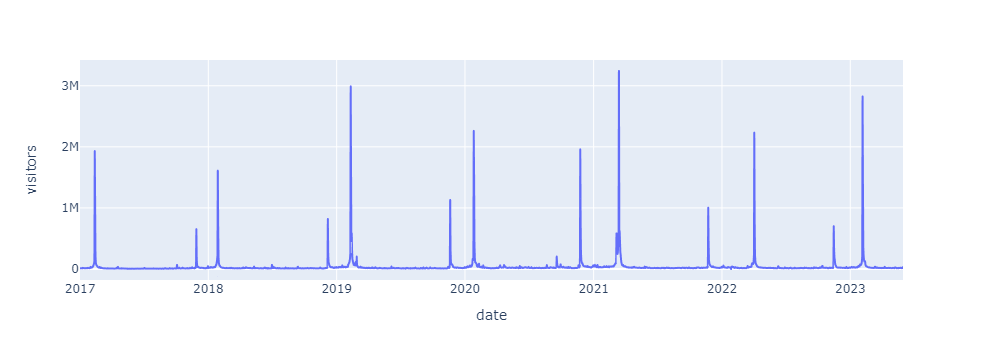

In [7]:
# Plot a line chart of the visitors on the site.
px.line(full_data, x="date", y="visitors")

<span style='background :#FFF59E'>**Remark:** The smaller spikes, typically around November/December of each year, are when the nominees are announced.</span>

**B.** What can you say about the visitors to the website by looking at the graph?

The number of visitors to the website spikes dramatically when the award shows are being held. There are also tiny spikes for when the nominees for the award show are announced.

## Task 4

Let's investigate what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.

**A.** Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.

In [9]:
# Use groupby to get the average number of visitors for each value in awards_night
full_data.groupby("awards_night")["visitors"].mean()

awards_night
0     32388.28
1   1389590.23
Name: visitors, dtype: float64

**B.** What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

For a normal day, there are around 32,000 visitors to the grammy website and around 1.39 million when it's awards night. This means that there are around 42.9 times more visitors on awards night than any other day.

<span style='background :#FFF59E'>**Remark:** This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of **one** event per year into one that continues to bring users back on the site year round?</span>

## Task 5

When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_data` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

Create two new dataframes:

1. `combined_site` for all dates before `2022-02-01`
2. `grammys` for all dates after (and including) `2022-02-01`

In [10]:
# Split the data to separate the full_df into two new dataframes. 
# One for before the switch of the websites and one for after

combined_site = full_data[full_data["date"] < "2022-02-01"]
grammys = full_data[full_data["date"] >= "2022-02-01"]

In [11]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a scary warning message 
combined_site = combined_site.copy()
grammys = grammys.copy()

In [12]:
# print the shape of the combined_site dataframe
combined_site.shape

(1857, 8)

<span style='background :#DDD5F3'>If done correctly, the `combined_site` dataframe should have a total of `1857` rows and `8` columns</span>

# Part II - It's all about KPIs

![](https://media.giphy.com/media/zoKdmndB8QBR2c0gjy/giphy.gif)

There are certain key performance indicators (KPIs) of interest for The Recording Academy. Let's investigate those a little more.

## Task 6

**A.** For each dataset,`combined_site`, `grammys`, and `rec_academy`, create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

<span style='background :#FFF59E'>**Hint:** Divide the `pageviews` by `sessions`</span>

In [13]:
# create the `pages_per_session` column for all 3 dataframes.
combined_site["pages_per_session"] = combined_site["pageviews"] / combined_site["sessions"]
grammys["pages_per_session"] = grammys["pageviews"] / grammys["sessions"]
rec_academy["pages_per_session"] = rec_academy["pageviews"] / rec_academy["sessions"]

**B.** Visualize this new metric using a line chart for each site. (You will have 3 separate graphs)

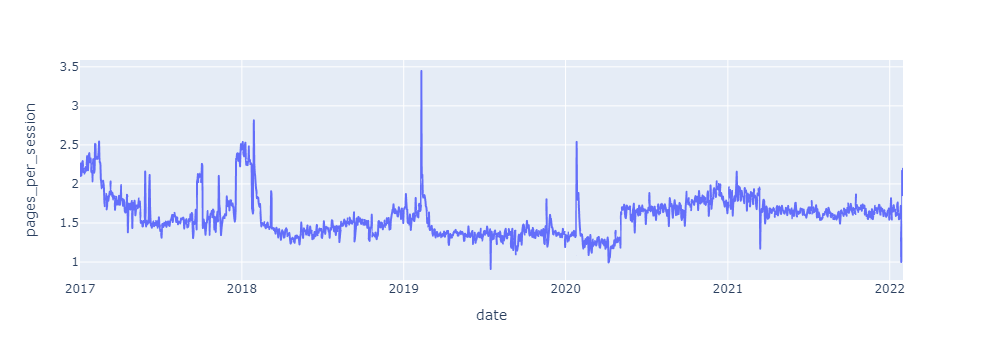

In [14]:
# combined_site graph
px.line(combined_site, x="date", y="pages_per_session")

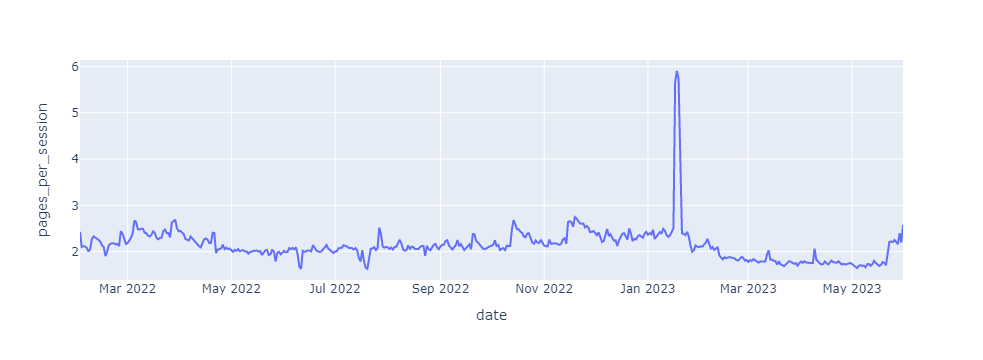

In [15]:
# grammys graph
px.line(grammys, x="date", y="pages_per_session")

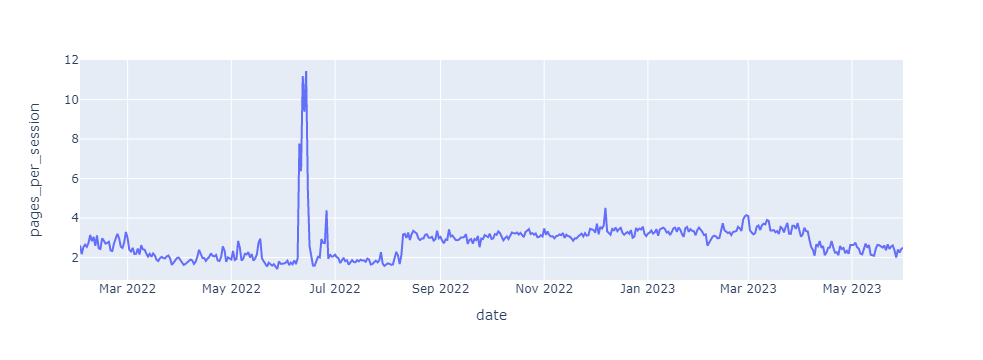

In [16]:
# rec_academy graph
px.line(rec_academy, x="date", y="pages_per_session")

**C.** Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?

<span style='background :#FFF59E'>**Note:** Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.</span>

It looks like the spikes that were present for the notable dates before the awards ceremony transferred from the combined website to grammys.com The recording academy website does not appear to have any significant spikes in data with the exception of one in June, but I don't think that the spike is related to the Grammy's itself.

## Task 7

**A.** Calculate the Bounce Rate for all 3 sites. Bounce Rate is a measure of the percentage of visitors who come to the site and *never  interact with the website and leave*.

Bounce Rate is an aggregate function. In other words, you will have to add up all of the `bounced_sessions` for each website and divide that the sum of all of the `sessions` for each website.

<span style='background :#FFF59E'>**Hint:** You will need use the `.sum()` function both in your numerator and denominator. Don't forget to multiply by 100 so that the answer appears as a percentage instead of a decimal.</span>

<span style='background :#FFF59E'>**Tip:** If you want to reduce the number of decimals shown in an f-string, you can add `:0.2f` at the end of the curly brackets with your variable. Example: `print(f'my value is: {my_value:0.2f}')`</span>

In [24]:
# Calculate the Bounce Rate for each site

# combined site
br_cs = (combined_site["bounced_sessions"] / combined_site["sessions"]).mean() * 100

# grammys site
br_grammys = (grammys["bounced_sessions"] / grammys["sessions"]).mean() * 100

# recording academy site
br_tra = (rec_academy["bounced_sessions"] / rec_academy["sessions"]).mean() * 100

# print each bounce rate using an f-string. 
print(f'Combined Website Bounce Rate: {br_cs:0.2f}%')
print(f'Grammy\'s Website Bounce Rate: {br_grammys:0.2f}%')
print(f'Recording Academy Website Bounce Rate: {br_tra:0.2f}%')

Combined Website Bounce Rate: 49.75%
Grammy's Website Bounce Rate: 47.53%
Recording Academy Website Bounce Rate: 39.29%


<span style='background :#DDD5F3'>If done correctly, the `combined_site` and `grammys` site will each have bounce rates in the low 40s. The `rec_academy` will have a bounce rate in the low 30s</span>

**B.** Another useful metric is how long on average visitors are staying on the website. 

Calculate the `mean` of the `avg_session_duration_secs` for each of the sites. 
Print each one using an f-string. 

In [27]:
# Calculate the average of the avg_session_duration_secs
avg_session_combined = combined_site["avg_session_duration_secs"].mean()
avg_session_grammys = grammys["avg_session_duration_secs"].mean()
avg_session_rec = rec_academy["avg_session_duration_secs"].mean()

# Print average session times.
print(f"Average Combined Website Session Time (secs): {avg_session_combined:0.2f}")
print(f"Average Grammy's Website Session Time (secs): {avg_session_grammys:0.2f}")
print(f"Average Recording Academy Website Session Time (secs): {avg_session_rec:0.2f}")

Average Combined Website Session Time (secs): 102.85
Average Grammy's Website Session Time (secs): 82.99
Average Recording Academy Website Session Time (secs): 128.50


**C.** Lastly, calculate the number of sessions per visitor. This is an indication of how often users are coming back to the site. The higher this number is the more times visitors are returning to your site (as an average).

<span style='background :#FFF59E'>**Hint:** Similar to the bounce rate, you will have to add up all the sessions and all the visits, then divide those two numbers to get the number of sessions per visitor.</span>

In [30]:
# Calculate the number of sessions per visitor
spv_combined = (combined_site["sessions"] / combined_site["visitors"]).mean()
spv_grammys = (grammys["sessions"] / grammys["visitors"]).mean()
spv_rec = (rec_academy["sessions"] / rec_academy["visitors"]).mean()

# Print the calculated values (I added this because I felt like it.)
print(f"Average Number of Sessions per Visitor for Combined Website: {spv_combined:0.2f}")
print(f"Average Number of Sessions per Visitor for Grammy's Website: {spv_grammys:0.2f}")
print(f"Average Number of Sessions per Visitor for Recording Academy Website: {spv_rec:0.2f}")

Average Number of Sessions per Visitor for Combined Website: 1.07
Average Number of Sessions per Visitor for Grammy's Website: 1.07
Average Number of Sessions per Visitor for Recording Academy Website: 1.20


# Part III - Demographics

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

Age demographics are a way to see which audience your content is resonating with the most. This can inform marketing campaigns, ads, and much more.

Let's investigate the demographics for the two websites. This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [31]:
# read in the files
age_grammys = pd.read_csv("datasets/grammys_age_demographics.csv")
age_tra = pd.read_csv("datasets/tra_age_demographics.csv")

In [33]:
# preview the age_grammys file. the age_tra will look very similar.
age_grammys.head()

,age_group,pct_visitors
0,18-24,27.37
1,25-34,24.13
2,35-44,18.72
3,45-54,13.57
4,55-64,9.82


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [34]:
# Create the website column for each dataframe
age_grammys["website"] = "Grammys"
age_tra["website"] = "Recording Academy"

**C.** use the `pd.concat()` method to join these two datasets together. 

In [37]:
# combine the two dataframes together
age_total = pd.concat([age_grammys, age_tra])

# preview the combined dataframe
print(age_total.head())
age_total.shape

  age_group  pct_visitors  website
0     18-24         27.37  Grammys
1     25-34         24.13  Grammys
2     35-44         18.72  Grammys
3     45-54         13.57  Grammys
4     55-64          9.82  Grammys


(12, 3)

<span style='background :#DDD5F3'>If done correctly your new dataframe will have `12` rows and `3` columns.</span>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.

<span style='background :#FFF59E'>**Hint:** You will need to use the `barmode='group'` option in `px.bar()`. See the code snippet below to guide you.</span>

```python
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

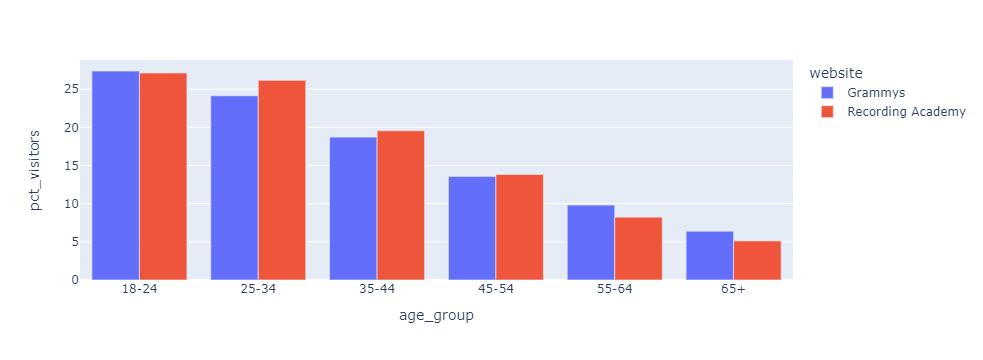

In [38]:
# Create bar chart
px.bar(age_total, x="age_group", y="pct_visitors", color="website", barmode="group")

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

The website for the recording academy has a mild bias towards people around the age of 25 to 54 whereas the Grammy's website has a similar bias for people older than 54.

# Part IV - Recommendation
![](https://media.giphy.com/media/0Av9l0VIc01y1isrDw/giphy.gif)

## Task 9

Using the work you did in this project, would you recommend that the websites stay separate? Please give a 2-3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

Splitting up the Grammy's website would only be a good idea if doing so increases overall retention to both websites on average as that effectively means that the recording academy as a whole is receiving more attention. The average number of sessions per visitor, average session time, and bounce rate are all good metric for measuring overall retention because they each show some aspect of user activity.

The average combined session time (102.85 s.) is three seconds shorter than the mean of the average Grammy's session time (82.99 s.) and the average Recording Academy session time (128.50 s.). This mean being 105.745 s. The average number of sessions per visitor is the same for both the combined website and the Grammy's website, but the average number of sessions per visitor for the Recording Academy website is larger than both figures. The bounce rate for the combined website is 49.75% whereas the bounce rate for the Grammy's website (47.53%) and the Recording Academy website (39.29%) are considerably smaller. All three of these metrics show that average user retention increased as a result of the two websites separating because users are visiting the two websites with longer sessions times on average, more sessions on average, and more interaction with both websites.

Given that splitting the Grammy's website into two websites effectively increased overall user retention, splitting the Grammy's website into two separate websites was absolutely a good idea, and the two websites should remain separate if the trends in the data continue into the future.

# LevelUp
![](https://media.giphy.com/media/6fUIhrlrHCzEHvY8oF/giphy.gif)

The Recording Academy also has data on the countries visitors on the website are coming from. They think that there may be a difference between the two websites. They want you to investigate and see if there is anything meaningful to report on.

The file `country_website_visitors.csv` has the following information:
- **country_code** - The two letter abbreviation for the country code. e.g. `CA` = Canada.
- **website** - The website the visitor was on, e.g., Grammys or Recording Academy.
- **pct_visitors** - The percentage of visitors from that country for that website. e.g. if the value is 4.2 then 4.2% of all of the website's traffic came from that particular country.

The file `iso_codes.csv` contains the full name of the country and its two letter abbreviation.

In [ ]:
# Load in the country data and save it to a dataframe called country_visitors
country_visitors = 

# Load in the iso codes data and save it to a dataframe called iso_df
iso_df =

In [ ]:
# preview country_visitors 


In [ ]:
# preview iso_df


Join the `iso_df` and the `country_visitors` dataframes together on the abbreviation column.

<span style='background :#FFF59E'>**Hint:** Since the two dataframes have different column names, you will need to use the `right_on` and `left_on` parameters in your `pd.merge()`</span>

In [1]:
# merge the two dataframes together


In [ ]:
# Subset to the Grammys data. 
grammys_only = 

# Sort the dataframe by the pct_visitors column. What are the top 10 countries with the most visits to the website.


In [ ]:
# Subset to the Recording Academy data. 
tra_only = 

# Sort the dataframe by the pct_visitors column. What are the top 10 countries with the most visits to the website.


What can you say about the visitors the each site? Pay particular attention to the `pct_visitors` column when looking at your top 10.

*(Double-click to write your answer)*